# Introduction

We have already performed various training experiments with different configurations of the learning rate values and schedules. In this notebook, our goal is to  analyze the results of these experiments to determine the optimal learning rate configuration. We are, in particular, interested in the values of the validation loss and the gap between the training and validation losses for each experiment.


First, some useful imports and a useful function which we will use to analyze the experiments.

In [ ]:
from google.colab import userdata
import os
import matplotlib.pyplot as plt

In [ ]:
token = userdata.get('witten_p_token')
!git clone https://{token}@github.com/mudassirmoosa/witten_gpt_p.git

%cd /content/witten_gpt_p

Cloning into 'witten_gpt_p'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 135 (delta 41), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 8.14 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/witten_gpt_p


In [ ]:
train_data_size = 1798

def loss_analysis_and_plot(experiment_sessions):

  '''
    Args: experiment_sessions : (List) sessions comprising
                                a given experiment.

    This provides us useful insights about this experiment.
    In particular, it will print validation loss and gap
    after each epoch. Moreover, it will generate a plot of
    the validation and training losses.
  '''

  # Toal number of epochs
  # Each session runs for 2 epochs
  num_epochs = 2*len(experiment_sessions)

  # Getting a list of steps
  # and list of learning rates
  steps = []
  # Recall that we have evaluated
  # losses after every 50 steps.
  for epoch in range(num_epochs):
    steps_epoch = [epoch*train_data_size + 50*k for k in range(int(train_data_size/50)+1)]
    steps_epoch.append(epoch*train_data_size + train_data_size - 1)
    steps = [*steps,*steps_epoch]

  # Getting losses from files
  train_losses = []
  val_losses = []
  for session in experiment_sessions:
    train_file_path = f"after_session_{session}/train_loss_history.txt"
    with open(train_file_path, 'r') as f:
      for line in f:
        train_losses.append(float(line.strip()))

    val_file_path = f"after_session_{session}/val_loss_history.txt"
    with open(val_file_path, 'r') as f:
      for line in f:
        val_losses.append(float(line.strip()))

  # Printing val losses and gaps after each epoch
  for k in range(num_epochs):
    print(f'Val loss after epoch {k} = {val_losses[37*(k+1) - 1]:.2f}')
    print(f'Gap after epoch {k} = {abs(val_losses[37*(k+1) - 1]-train_losses[37*(k+1) - 1]):.2f}')

  # A list to specify the location of
  # the boundaries of epochs
  epoch_boundaries = [-100000000.0] * (int(train_data_size/50) + 2) * num_epochs
  for k in range(1,num_epochs):
    epoch_boundaries[k*(int(train_data_size/50) + 2)] = 4.0


  # Plotting the losses
  plt.figure(figsize=(12, 5))
  plt.plot(steps,train_losses, color='b', label='Train Loss')
  plt.plot(steps,val_losses, color='r', label='Val Loss')
  plt.plot(steps, epoch_boundaries, '--', color='g', label='Epoch boundaries')
  plt.title(f'Experiment with sessions {experiment_sessions}')
  plt.xlabel('Steps')
  plt.ylim(bottom=0,top=4.0)
  plt.xlim(left=0)
  plt.legend()
  plt.show()

# Experiment 1:

In our first experiment, we will train for 6 epochs with a constant learning rate of $5\times 10^{-5}$. This corresponds to sessions 1, 3, and 10.

Val loss after epoch 0 = 2.38
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.28
Gap after epoch 1 = 0.04
Val loss after epoch 2 = 2.24
Gap after epoch 2 = 0.03
Val loss after epoch 3 = 2.21
Gap after epoch 3 = 0.08
Val loss after epoch 4 = 2.22
Gap after epoch 4 = 0.16
Val loss after epoch 5 = 2.20
Gap after epoch 5 = 0.19


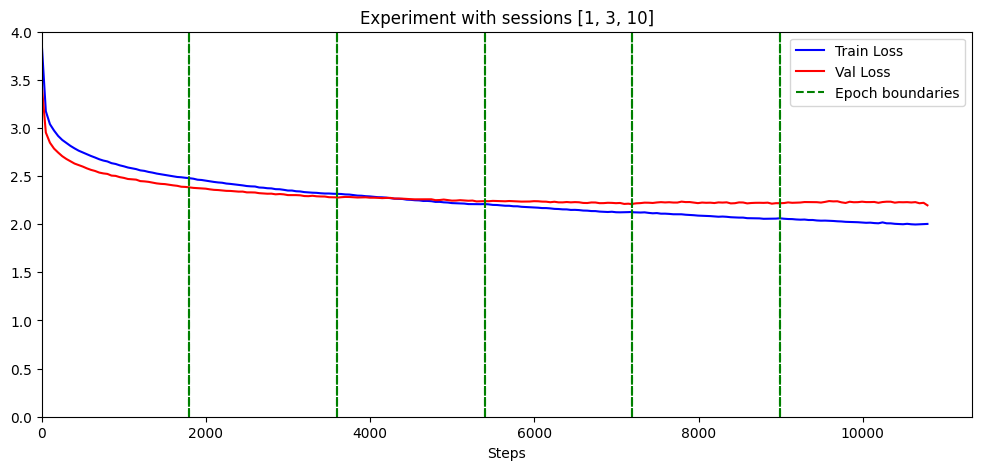

In [ ]:
sessions = [1,3,10]
loss_analysis_and_plot(sessions)

We get a good training and validation losses though it seems that we should stop after the fourth epoch (i.e. epoch 3) since the validation loss is constant during the last two epoch.

# Experiment 2:

In this experiment, we will train for 6 epochs. For the first two epochs, we will take the learning rate to be $5\times 10^{-5}$ whereas for the last four epochs, we will take the learning rate to be $3\times 10^{-5}$. This corresponds to sessions 1, 4, and 12.

Val loss after epoch 0 = 2.38
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.28
Gap after epoch 1 = 0.04
Val loss after epoch 2 = 2.25
Gap after epoch 2 = 0.02
Val loss after epoch 3 = 2.22
Gap after epoch 3 = 0.05
Val loss after epoch 4 = 2.22
Gap after epoch 4 = 0.10
Val loss after epoch 5 = 2.21
Gap after epoch 5 = 0.13


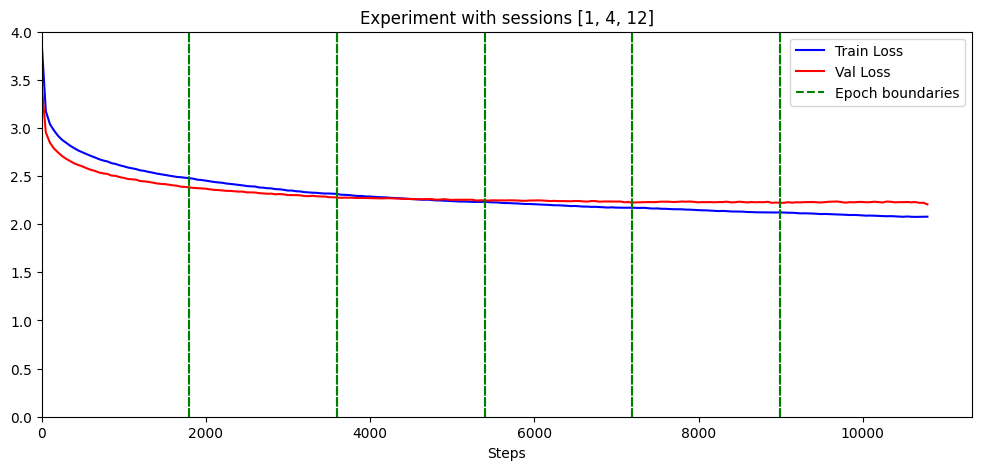

In [ ]:
sessions = [1,4,12]
loss_analysis_and_plot(sessions)

Just like in experiment 1, the validation loss has saturated after the fourth epoch (epoch 3). Therefore, we conclude that stopping after the fourth epoch (i.e. epoch 3) is optimal here as well.

Moreover, it is interesting to compare the result at the end of epoch 3 of this experiment with the results at the end of epoch 3 of experiment 1. Even though the validation loss is slightly higher by an amount of 0.01 (2.22 vs 2.21), the gap is lower by an amount of 0.03 (0.05 vs 0.08).


# Experiment 3:

So far we have observed that the validation loss does not decrease in the last two epochs. So we now ask if we can get the validation loss to decrease if we use a smaller learning rate in the last two epochs. To answer this, we will do an experiment in which the training during the first four epochs will be identical to the training in the first four epochs in experiment 2, but the last two epoch will have a learning rate of $1\times 10^{-5}$ instead of $3\times 10^{-5}$.

This means that in this experiment, we will train the first two epochs (epochs 0 and 1) with a learning rate of $5\times 10^{-5}$, epochs 2 and 3 with a learning rate of $3\times 10^{-5}$, and the last two epochs (epochs 4 and 5) with a learning rate of $1\times 10^{-5}$. This corresponds to sessions 1, 4, and 13.

Val loss after epoch 0 = 2.38
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.28
Gap after epoch 1 = 0.04
Val loss after epoch 2 = 2.25
Gap after epoch 2 = 0.02
Val loss after epoch 3 = 2.22
Gap after epoch 3 = 0.05
Val loss after epoch 4 = 2.23
Gap after epoch 4 = 0.09
Val loss after epoch 5 = 2.23
Gap after epoch 5 = 0.10


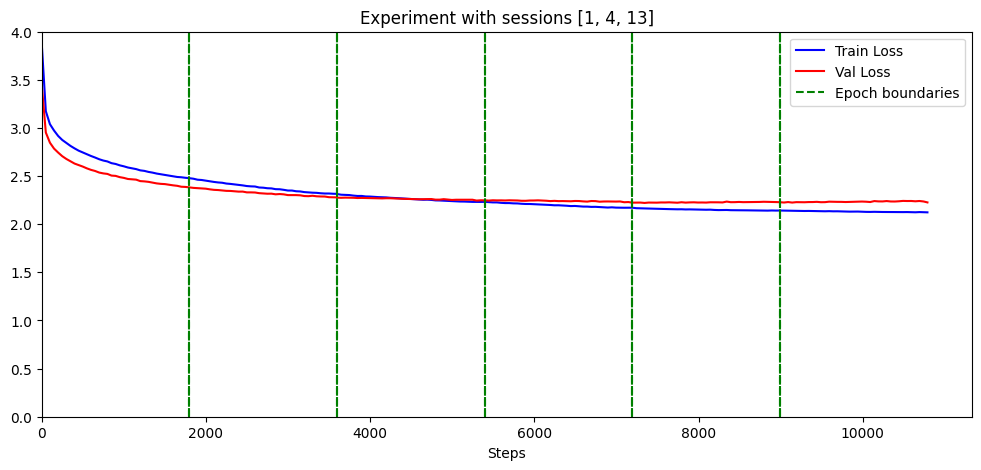

In [ ]:
sessions = [1,4,13]
loss_analysis_and_plot(sessions)

This experiment has shown that the validation loss does not change in the last two epochs even if we use a smaller learning rate in these epochs. So we conclude that stopping after the fourth epoch is still the optimal configuration.

# Experiment 4:

Now we explore how the results change at the end of epoch 3 if the epochs 2 and 3 were trained with a learning rate of $2\times 10^{-5}$ instead of the learning rate of $3\times 10^{-5}$. Therefore, in this experiment, we train the first two epochs with a learning rate of $5\times 10^{-5}$ and the next two epochs with a learning rate of $2\times 10^{-5}$. (This corresponds to sessions 1 and 5.)

Val loss after epoch 0 = 2.38
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.28
Gap after epoch 1 = 0.04
Val loss after epoch 2 = 2.25
Gap after epoch 2 = 0.01
Val loss after epoch 3 = 2.24
Gap after epoch 3 = 0.03


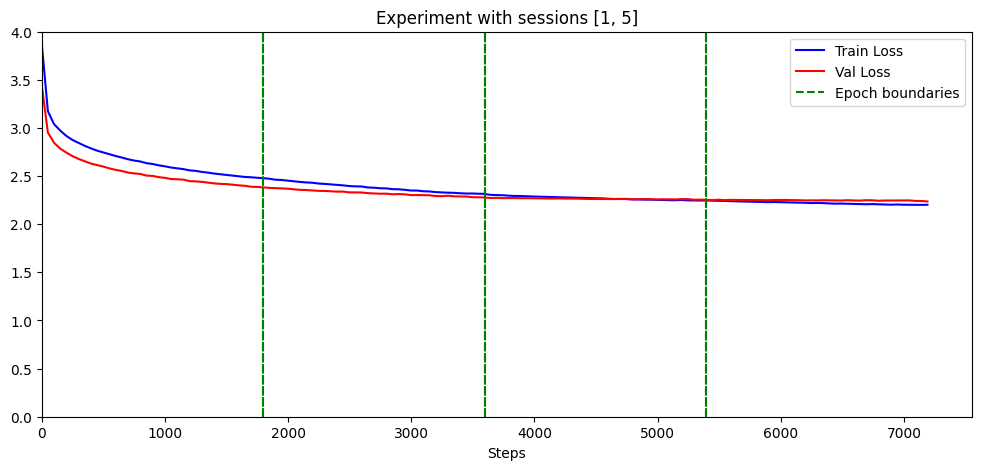

In [ ]:
sessions = [1,5]
loss_analysis_and_plot(sessions)

Here we notice that even though the validation loss at the end of epoch 3 of this experiment is higher (by an amount of 0.02) than the validation loss at the end of epoch 3 of experiment 2, the loss gap is lower (also by an amount of 0.02.) So it is tricky to choose between this experiment and experiment 2.

# Experiment 5:

Until now, we have only chosen the learning rate to be piecewise constant. In the next three experiments, we will explore linearly decaying learning rates.

In this experiment, we will train the first two epochs (epochs 0 and 1) with a constant learning rate of $5\times 10^{-5}$, train the next two epochs (epochs 2 and 3) with a learning rate that linearly decreases from $3×10^{-5}$ to $1\times 10^{-5}$, and train the last two epochs (epochs 4 and 5) with a constant learning rate of $1\times 10^{-5}$. This experiment corresponds to sessions 1, 6, and 14.

Val loss after epoch 0 = 2.38
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.28
Gap after epoch 1 = 0.04
Val loss after epoch 2 = 2.25
Gap after epoch 2 = 0.01
Val loss after epoch 3 = 2.23
Gap after epoch 3 = 0.04
Val loss after epoch 4 = 2.24
Gap after epoch 4 = 0.06
Val loss after epoch 5 = 2.23
Gap after epoch 5 = 0.07


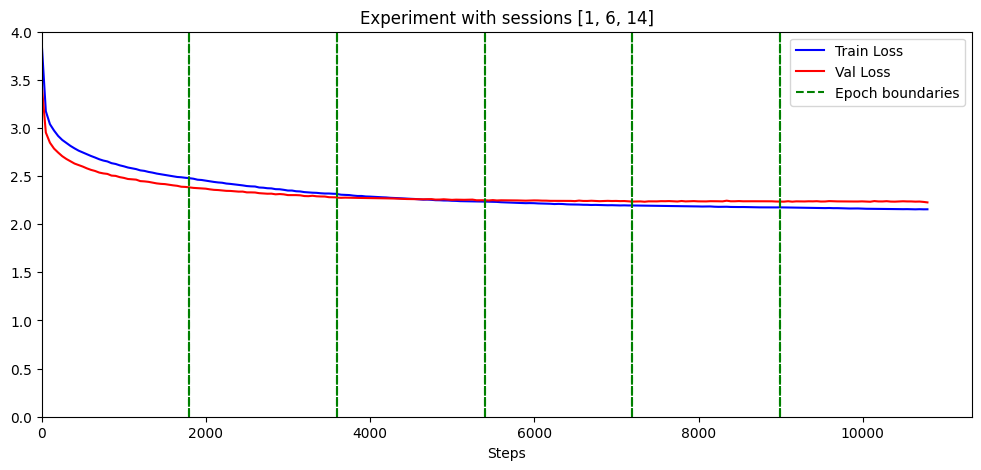

In [ ]:
sessions = [1,6,14]
loss_analysis_and_plot(sessions)

Here we also observe that the validation loss has saturatated in the last two epochs, so we should stop after epoch 3. Moreover, this experiment seems like a good middle ground between experiment 2 and experiment 4.


# Experiment 6:

Now we will use a linearly decreasing learning rate even from the beginning. In particular, we will use a learning rate that linearly decreases from $5\times 10^{-5}$ to $1\times 10^{-5}$ during the first four epochs but the learning rate is constant (of $1\times 10^{-5}$) during the last two epochs. This corresponds to sessions 2, 8, and 15.

Val loss after epoch 0 = 2.40
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.30
Gap after epoch 1 = 0.05
Val loss after epoch 2 = 2.27
Gap after epoch 2 = 0.01
Val loss after epoch 3 = 2.25
Gap after epoch 3 = 0.01
Val loss after epoch 4 = 2.25
Gap after epoch 4 = 0.04
Val loss after epoch 5 = 2.24
Gap after epoch 5 = 0.05


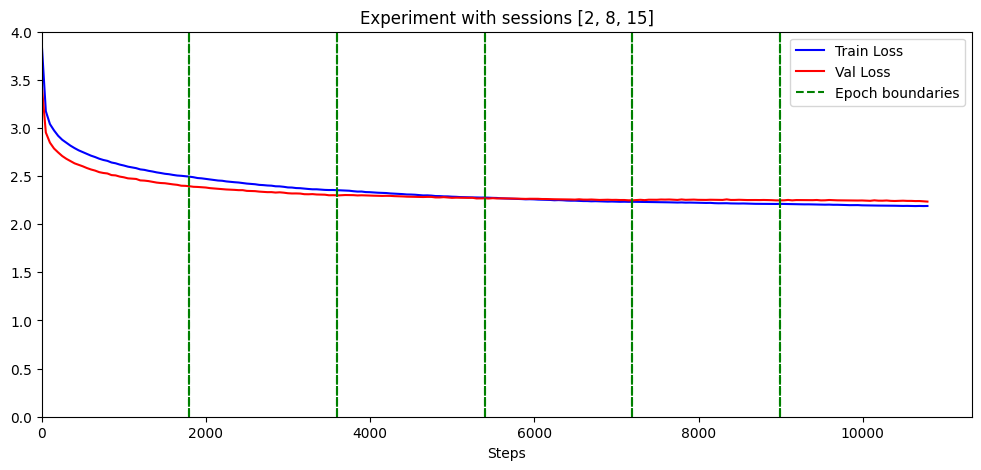

In [ ]:
sessions = [2,8,15]
loss_analysis_and_plot(sessions)

The validation loss has saturated in the last two epochs in this experiment as well.

# Experiment 7:

In this last experiment, we will train with a linearly decaying learning rate such that the learning rate decreases from $5\times 10^{-3}$ to $3\times 10^{-3}$ during the first two epochs and the learning rate decreases from $3\times 10^{-3}$ to zero during the next two epochs. This corresponds to sessiosn 2 and 9.

Val loss after epoch 0 = 2.40
Gap after epoch 0 = 0.10
Val loss after epoch 1 = 2.30
Gap after epoch 1 = 0.05
Val loss after epoch 2 = 2.27
Gap after epoch 2 = 0.01
Val loss after epoch 3 = 2.26
Gap after epoch 3 = 0.01


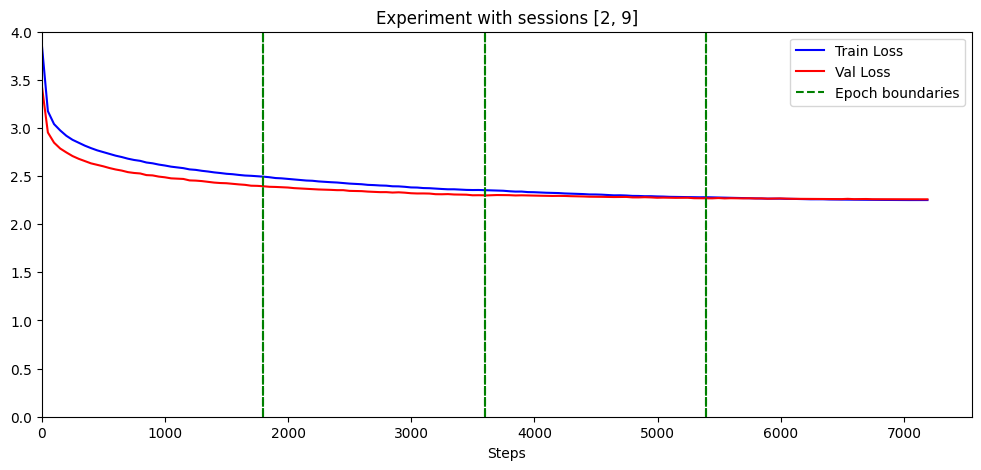

In [ ]:
sessions = [2,9]
loss_analysis_and_plot(sessions)

In this experiment, the validation loss is higher than the rest of the experiments, so perhaps this is not the optimal setting of the learning rate.

# Conclusions

In all of our experiments, training for more than four epochs does not look optimal.

At the end of four epochs, the validation loss was 2.22, 2.23, and 2.24 for experiments 2, 5, and 4, respectively. On the other hand, the gap was 0.05, 0.04, and 0.03 for experiments 2, 5, and 4, respectively.

In principle, we want both the validation loss and the gap to be lower. Lower gap would mean better generalizability (less overfitting) whereas lower validation loss means better 'performance' or 'accuracy'.

It seems that experiments 5 and experiments 2 led to optimal results.